## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [46]:
# Start solution here
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Lasso

In [7]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("NFL Play by Play 2009-2018 (v5).csv")
#import locally through drive
#same dataset as EDA project

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [9]:
df.shape

(449371, 255)

In [10]:
#organizing data for just the SF 49ers, and choosing which columns to keep
df49 = df[(df.posteam=='SF')]
df49 = df49[['yardline_100', 'down', 'ydstogo', 'score_differential', 'play_type', 'pass_length', 'pass_location', 'run_location']]
df49.head()

,yardline_100,down,ydstogo,score_differential,play_type,pass_length,pass_location,run_location
1721,74.0,1.0,10,0.0,run,NaN,NaN,right
1722,76.0,2.0,12,0.0,run,NaN,NaN,middle
1723,79.0,3.0,15,0.0,pass,short,right,NaN
1724,66.0,4.0,2,0.0,punt,NaN,NaN,NaN
1730,36.0,1.0,10,0.0,pass,short,left,NaN


In [11]:
#further cleaning up
def Full_Play(play):
  play_type, pass_location,run_location = play  
  if play_type == 'pass':
    return str(play_type)+'_'+ str(pass_location)
  else:
    return str(play_type)+'_'+ str(run_location)

df49['Full_Play'] = df49[['play_type','pass_location', 'run_location']].apply(Full_Play, axis=1)
df49 = df49[(df49.Full_Play.isin(['pass_left', 'pass_middle','pass_right','run_left', 'run_middle', 'run_right']))]


print(df49)

        yardline_100  down  ydstogo  score_differential play_type pass_length  \
1721            74.0   1.0       10                 0.0       run         NaN   
1722            76.0   2.0       12                 0.0       run         NaN   
1723            79.0   3.0       15                 0.0      pass       short   
1730            36.0   1.0       10                 0.0      pass       short   
1732            23.0   1.0       10                 0.0       run         NaN   
...              ...   ...      ...                 ...       ...         ...   
448843          58.0   2.0        6                 0.0       run         NaN   
448844          51.0   1.0       10                 0.0       run         NaN   
448846          41.0   1.0       10                 0.0       run         NaN   
448847          25.0   1.0       10                 0.0       run         NaN   
448848          22.0   2.0        7                 0.0       run         NaN   

       pass_location run_lo

In [12]:
df49.shape

(9132, 9)

In [13]:
#Split your data in training and testing
#xnondummy = df49.iloc[:,1:]
#X = pd.get_dummies(xnondummy, columns = xnondummy.columns) 
#y = df49.iloc[:, 0] 

X = df49[["ydstogo","down",'score_differential','yardline_100']]
y = df49[["Full_Play"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train,y_train)
baseacc = dummy_classifier.score(X_test,y_test)
print("Baseline Accurary = ", baseacc)


#gini
#max depth
#outer loop
#cross validate function
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Baseline Accurary =  0.21313868613138687
(6392, 4)
(6392, 1)
(2740, 4)
(2740, 1)


In [14]:

dt = DecisionTreeClassifier(criterion='gini',max_depth=100, random_state = 42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
baseaccu = dt.score(X_test,y_test)
print("Baseline Accurary = ", baseaccu)

Baseline Accurary =  0.21751824817518248


In [15]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
log_pred = logReg.predict(X_test)
print(" Accuracy = ", metrics.accuracy_score(y_test,log_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy =  0.23905109489051096


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[118   0 360  70   0   2]
 [ 65   0 196  32   0   2]
 [116   0 397  69   0   2]
 [ 60   0 297 134   0  10]
 [ 67   0 225  97   0   5]
 [ 59   0 246 105   0   6]]


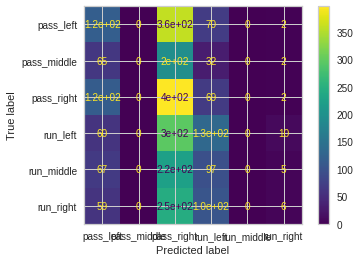

In [16]:
c_matrix = metrics.confusion_matrix(y_test,log_pred)
print(c_matrix)
metrics.plot_confusion_matrix(logReg, X_test, y_test)
plt.show()

[[149  55 124  84  48  90]
 [ 64  36  82  41  37  35]
 [133  72 159  87  68  65]
 [102  44 105 117  68  65]
 [ 84  31  77  75  63  64]
 [ 93  41  88  65  57  72]]


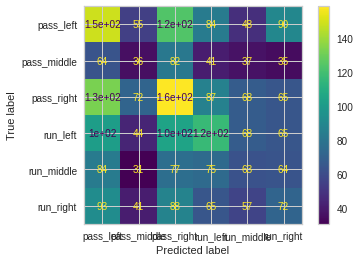

In [17]:
c_matrix = metrics.confusion_matrix(y_test,dt_pred)
print(c_matrix)
metrics.plot_confusion_matrix(dt,X_test,y_test)
plt.show()

In [18]:
#Try different models on your training dataset - then select the most promising model
#Bagging
base_estimator = DecisionTreeClassifier()

model_bagging = BaggingClassifier(base_estimator,random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)



 Accuracy =  0.22226277372262773


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print(classification_report(y_test,pred_bagging))

              precision    recall  f1-score   support

   pass_left       0.24      0.27      0.25       550
 pass_middle       0.15      0.13      0.13       295
  pass_right       0.26      0.27      0.26       584
    run_left       0.25      0.26      0.25       501
  run_middle       0.19      0.16      0.17       394
   run_right       0.19      0.18      0.19       416

    accuracy                           0.22      2740
   macro avg       0.21      0.21      0.21      2740
weighted avg       0.22      0.22      0.22      2740



[[146  62 127  86  52  77]
 [ 80  37  78  43  32  25]
 [137  58 157  85  76  71]
 [ 88  37 107 128  71  70]
 [ 76  27  69  78  65  79]
 [ 83  33  77  94  53  76]]


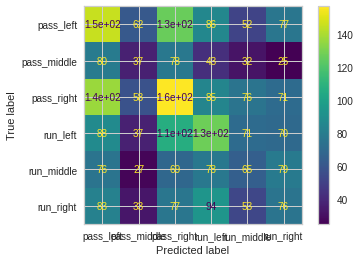

In [20]:
c_matrix = metrics.confusion_matrix(y_test,pred_bagging)
print(c_matrix)
metrics.plot_confusion_matrix(model_bagging,X_test,y_test)
plt.show()

In [ ]:
#linear_model = LinearRegression()
#linear_model.fit(X_train,y_train)
#visualizer = ResidualsPlot(linear_model)
#visualizer.fit(X_train, y_train)
#visualizer.score(X_test, pred_bagging)
#visualizer.poof()

In [21]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print(' Accuracy = ', accuracy_rf)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 Accuracy =  0.22189781021897811


In [22]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

   pass_left       0.24      0.25      0.24       550
 pass_middle       0.12      0.09      0.11       295
  pass_right       0.25      0.29      0.27       584
    run_left       0.25      0.26      0.25       501
  run_middle       0.19      0.19      0.19       394
   run_right       0.19      0.18      0.19       416

    accuracy                           0.22      2740
   macro avg       0.21      0.21      0.21      2740
weighted avg       0.22      0.22      0.22      2740



[[136  50 145  87  56  76]
 [ 82  28  91  39  30  25]
 [131  61 167  90  72  63]
 [ 82  33 101 128  80  77]
 [ 62  25  70  84  73  80]
 [ 75  29  88  75  73  76]]


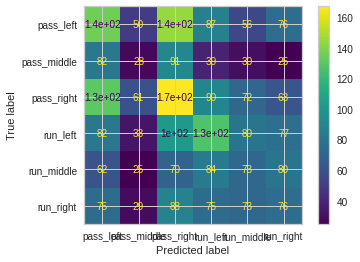

In [23]:
c_matrix = metrics.confusion_matrix(y_test, predict_rf)
print(c_matrix)
metrics.plot_confusion_matrix(model_rf,X_test,y_test)
plt.show()

In [24]:
#feature_importances = model_rf.feature_importances_
#features = X_train.columns
#df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
#print(df)

print(model_rf.feature_importances_)
featimp = pd.DataFrame(zip(X_train.columns,model_rf.feature_importances_))
feat = (featimp.sort_values(1, ascending= False))
print("The breakdown of the most important features are: ",feat.iloc[:10])

[0.14581292 0.04295665 0.29235375 0.51887668]
The breakdown of the most important features are:                      0         1
3        yardline_100  0.518877
2  score_differential  0.292354
0             ydstogo  0.145813
1                down  0.042957


In [ ]:
#linear_model = LinearRegression()
#linear_model.fit(X_train,y_train)
#visualizer = ResidualsPlot(linear_model)
#visualizer.fit(X_train, y_train)
#visualizer.score(X_test, predict_rf)
#visualizer.poof()

In [25]:
#Boosting
base_est = DecisionTreeClassifier(max_depth=100)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=.3)
ada_boost1.fit(X_train, y_train)

print(accuracy_score(y_test,ada_boost1.predict(X_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2208029197080292


In [26]:
print(ada_boost1.feature_importances_)
featimp = pd.DataFrame(zip(X_train.columns,ada_boost1.feature_importances_))
feat = (featimp.sort_values(1, ascending= False))
print("The breakdown of the most important features are: ",feat.iloc[:10])

[nan nan nan nan]
The breakdown of the most important features are:                      0   1
0             ydstogo NaN
1                down NaN
2  score_differential NaN
3        yardline_100 NaN


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:578: RuntimeWarning: invalid value encountered in true_divide
  return self.tree_.compute_feature_importances()


[[157  60 136  85  40  72]
 [ 78  39  75  39  39  25]
 [143  62 170  86  67  56]
 [ 91  39 123 108  67  73]
 [ 85  24  79  77  61  68]
 [ 87  34  83  76  66  70]]


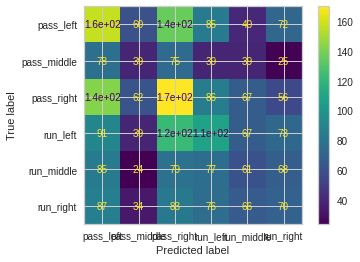

In [27]:
c_matrix = metrics.confusion_matrix(y_test, ada_boost1.predict(X_test))
print(c_matrix)
metrics.plot_confusion_matrix(ada_boost1,X_test,y_test)
plt.show()

In [ ]:
#linear_model = LinearRegression()
#linear_model.fit(X_train,y_train)
#visualizer = ResidualsPlot(linear_model)
#Visualizer.fit(X_train, y_train)
#visualizer.score(X_test, ada_boost1.predict(X_test))
#visualizer.poof()

In [28]:
rfClf = RandomForestClassifier(n_estimators=200, max_depth = 4)
dfClf = DecisionTreeClassifier(max_depth = 4) 
svmClf = SVC(probability=True, random_state=0) 
logClf = LogisticRegression(random_state=0)

clf2 = VotingClassifier(estimators = [('rf',rfClf), ('df',dfClf), ('svm',svmClf), ('log', logClf)], voting='soft') 

clf2.fit(X_train, y_train)

clf2_pred = clf2.predict(X_test)
#recall_voting = recall_score(y_test, clf2_pred)
#precision_voting = precision_score(y_test, clf2_pred)
print('Accuracy score', accuracy_score(y_test, clf2_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy score 0.24452554744525548


In [61]:
#Use cross validation to fine tune the model’s parameters such as alpha in lasso

#little confused here, tried using cross validation in multiple ways, but it seems since I used full plays it cant convert to float. 

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
y_pred_lass = lasso_reg.predict(X_test)
#model = Lasso(alpha=1.0)
#model.fit(X, y)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


#pred = cross_val_predict(model, X_train, y_train, cv=3)
#c_matrix(y_train, pred) 
#plot_c_matrix(model, X_test, y_test)

#model = Lasso(alpha=1.0)
#model.fit(X, y)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#reg = bag_model.Lasso(alpha = .1)
#reg.fit([[0,0],[0,0],[1,1]],[0,0.1,1])




ValueError: ignored